In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/image-compression/lion.jpg
/kaggle/input/image-compression/meerkat.jpg
/kaggle/input/image-compression/dog.jpg
/kaggle/input/image-compression/bunny (1).jpg
/kaggle/input/image-compression/fox.jpg
/kaggle/input/image-compression/panda.jpg
/kaggle/input/image-compression/wolf.jpg


In [2]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import matplotlib.image as image
%matplotlib inline
plt.style.use("ggplot")

from skimage import io
from skimage.io import imread, imshow
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.datasets import load_sample_image
import seaborn as sns; sns.set()

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/image-compression/lion.jpg
/kaggle/input/image-compression/meerkat.jpg
/kaggle/input/image-compression/dog.jpg
/kaggle/input/image-compression/bunny (1).jpg
/kaggle/input/image-compression/fox.jpg
/kaggle/input/image-compression/panda.jpg
/kaggle/input/image-compression/wolf.jpg


(381, 271, 3)
309753


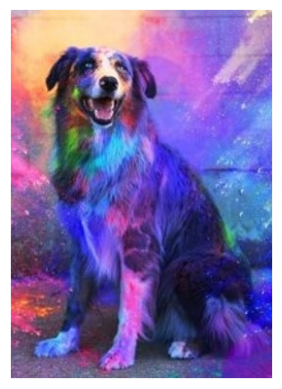

In [3]:
dog = imread('/kaggle/input/image-compression/dog.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(dog);
print(dog.shape)
print(dog.size)

(298, 203, 3)
181482


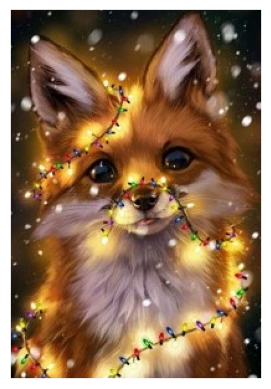

In [4]:
fox = imread('/kaggle/input/image-compression/fox.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(fox);
print(fox.shape)
print(fox.size)

(275, 220, 3)
181500


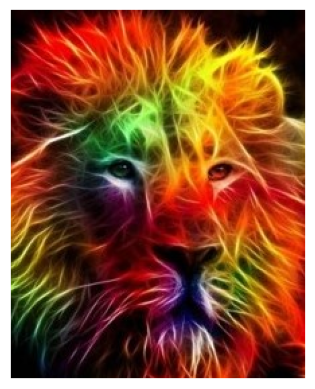

In [5]:
lion = imread('/kaggle/input/image-compression/lion.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(lion);
print(lion.shape)
print(lion.size)

(743, 990, 3)
2206710


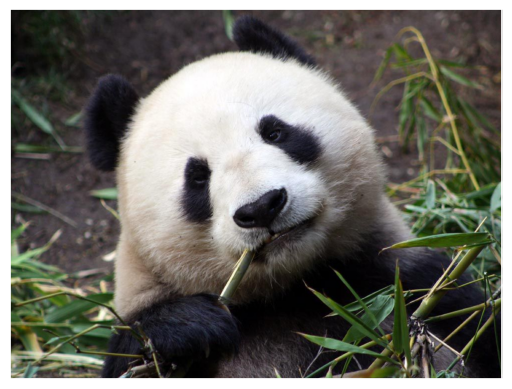

In [6]:
panda = imread('/kaggle/input/image-compression/panda.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(panda);
print(panda.shape)
print(panda.size)

(328, 302, 3)
297168


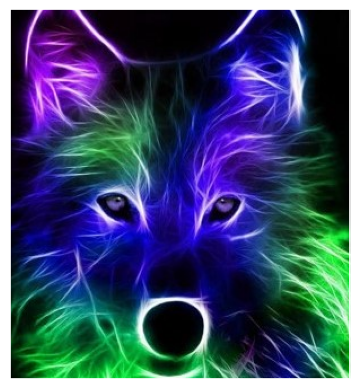

In [7]:
wolf = imread('/kaggle/input/image-compression/wolf.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(wolf);
print(wolf.shape)
print(wolf.size)

In [8]:
doggy = dog / 255.0 # use 0...1 scale
doggy = doggy.reshape(381 * 271, 3)
doggy.shape

(103251, 3)

In [9]:
foxy = fox / 255.0 # use 0...1 scale
foxy = foxy.reshape(298 * 203, 3)
foxy.shape

(60494, 3)

In [10]:
liony = lion / 255.0 # use 0...1 scale
liony = liony.reshape(275 * 220, 3)
liony.shape

(60500, 3)

In [11]:
wolfy = wolf / 255.0 # use 0...1 scale
wolfy = wolfy.reshape(328 * 302, 3)
wolfy.shape

(99056, 3)

In [12]:
def plot_pixels(doggy, title, colors=None, N=10000):
    if colors is None:
        colors = doggy
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(doggy.shape[0])[:N]
    colors = colors[i]
    R, G, B = doggy[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

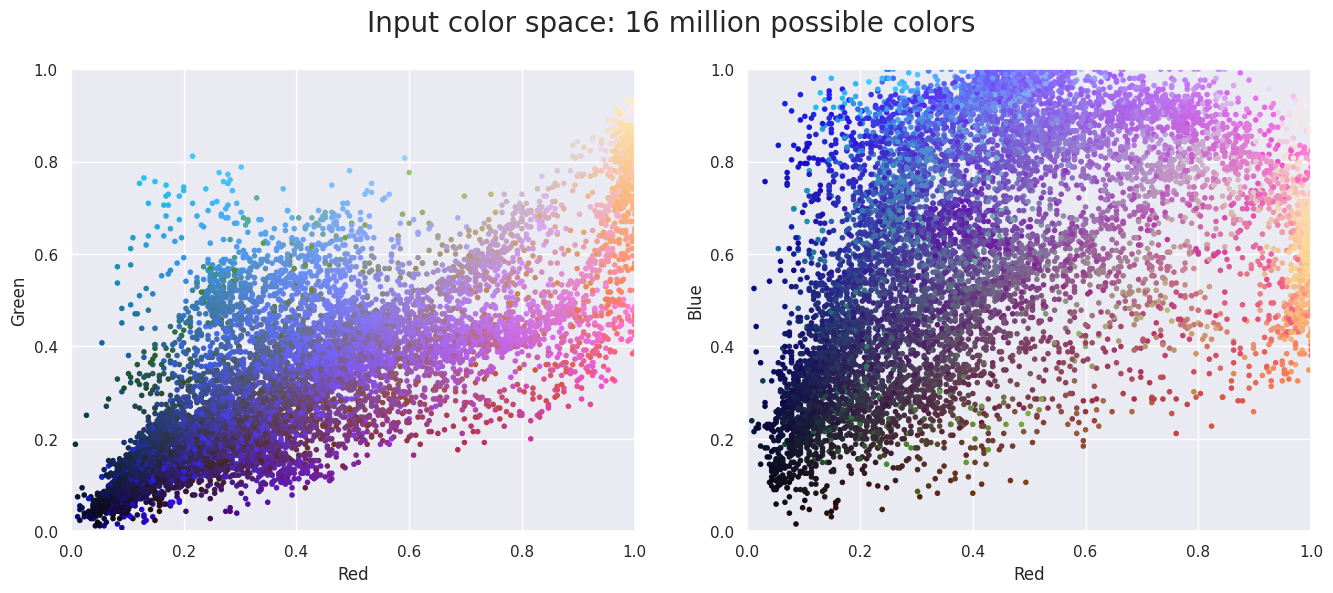

In [13]:
plot_pixels(doggy, title='Input color space: 16 million possible colors')


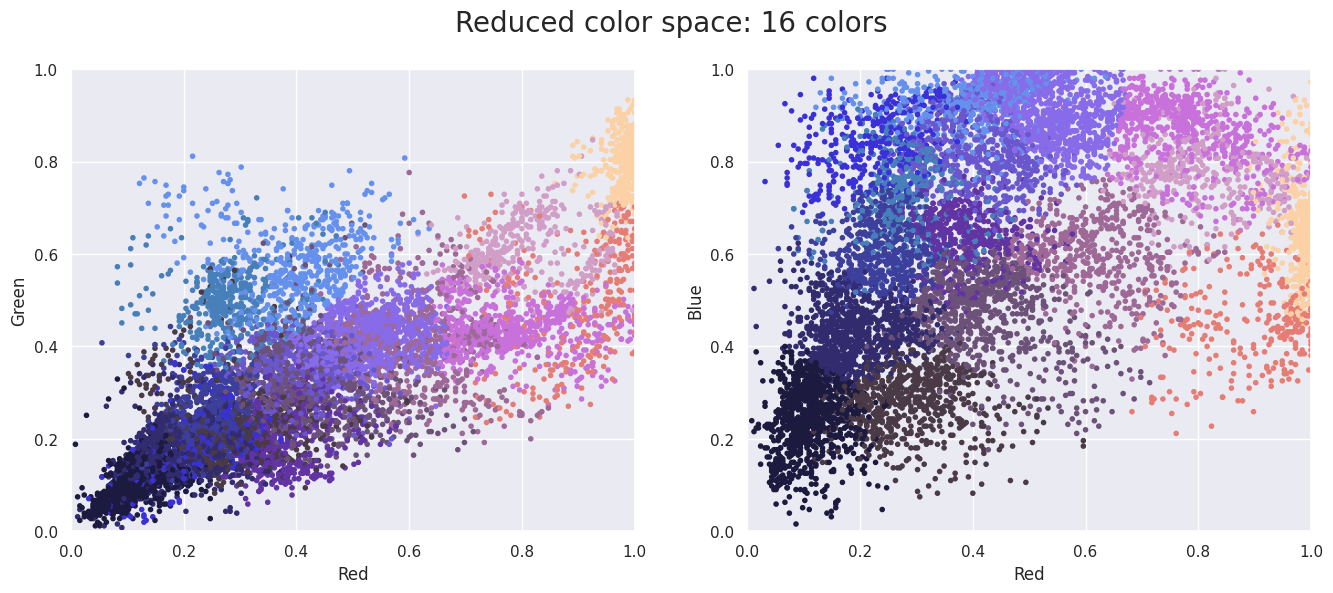

In [14]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(doggy)
new_colors = kmeans.cluster_centers_[kmeans.predict(doggy)]

plot_pixels(doggy, colors=new_colors,
            title="Reduced color space: 16 colors")

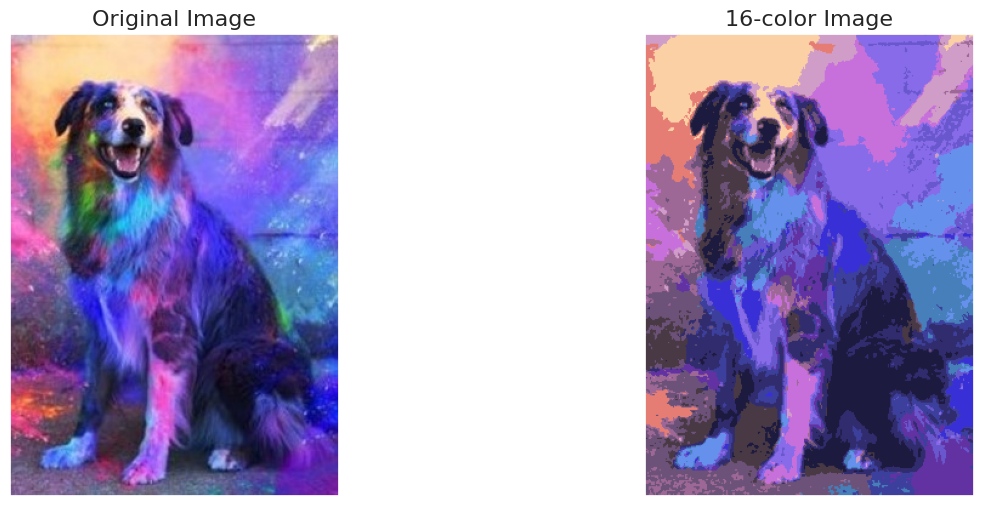

In [15]:
dog_recolored = new_colors.reshape(dog.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(dog)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(dog_recolored)
ax[1].set_title('16-color Image', size=16);

# store to file
plt.savefig("dog_kmean.png", dpi=125)

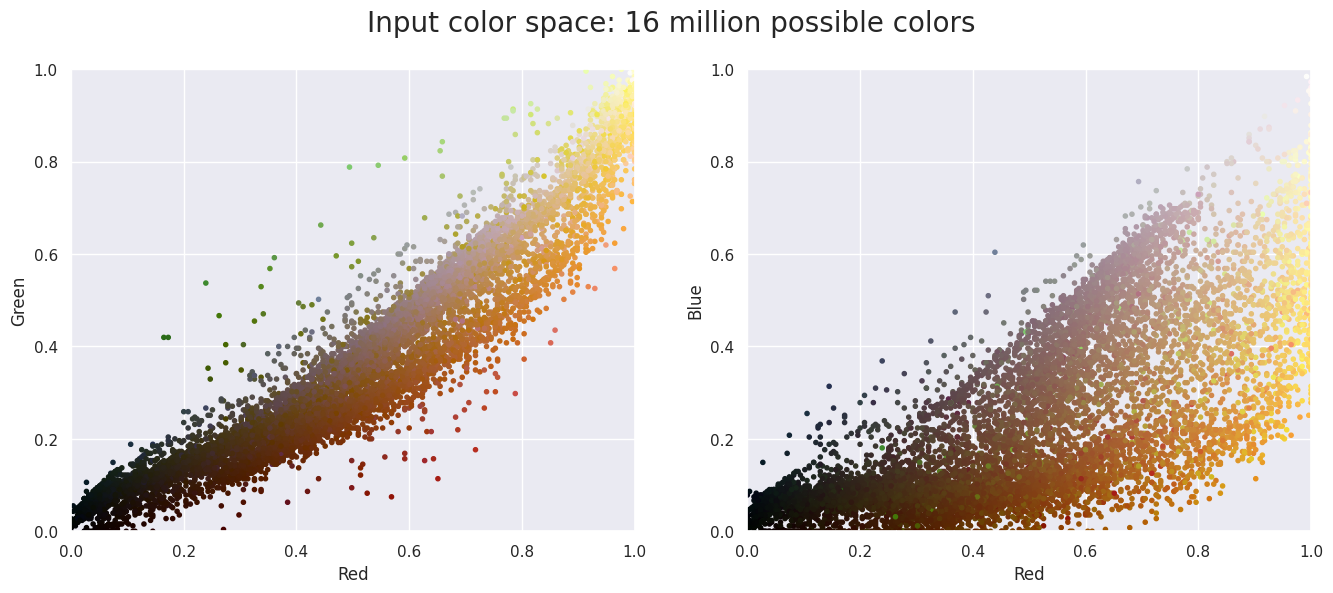

In [16]:
plot_pixels(foxy, title='Input color space: 16 million possible colors')

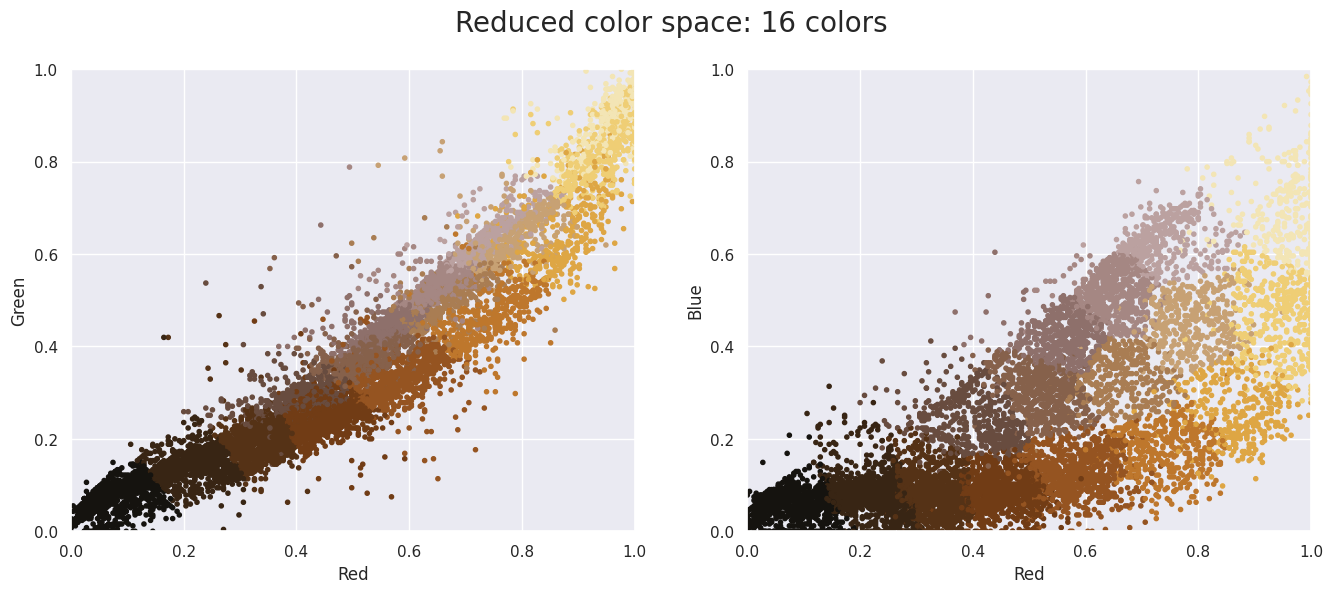

In [17]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(foxy)
new_colors = kmeans.cluster_centers_[kmeans.predict(foxy)]

plot_pixels(foxy, colors=new_colors,
            title="Reduced color space: 16 colors")


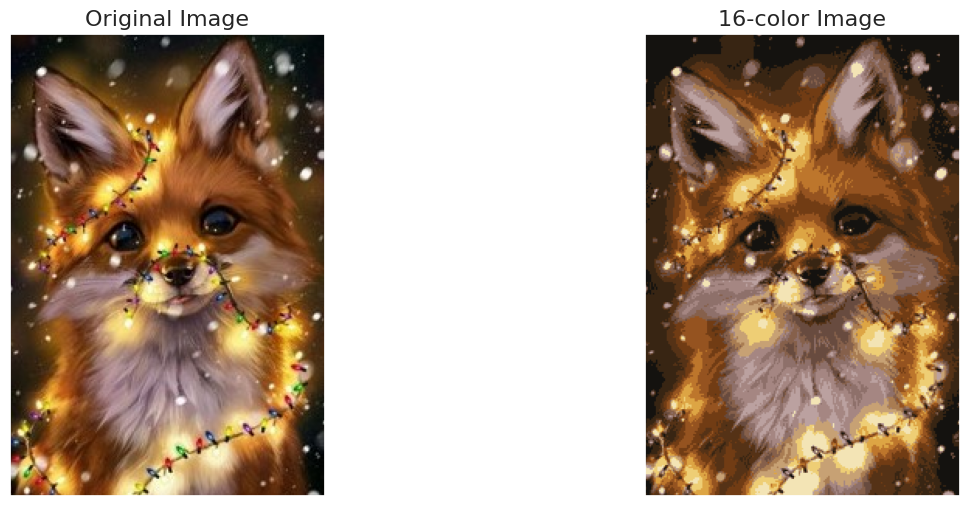

In [18]:
fox_recolored = new_colors.reshape(fox.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(fox)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(fox_recolored)
ax[1].set_title('16-color Image', size=16);

# store to file
plt.savefig("fox_kmean.png", dpi=125)


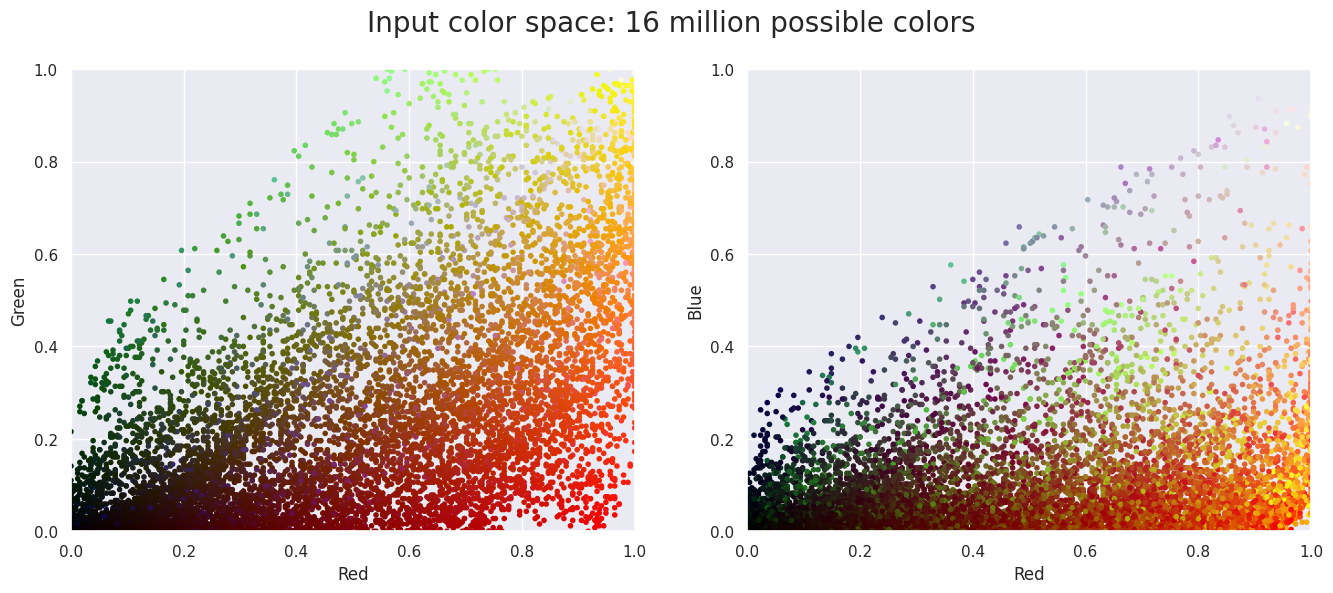

In [19]:
plot_pixels(liony, title='Input color space: 16 million possible colors')

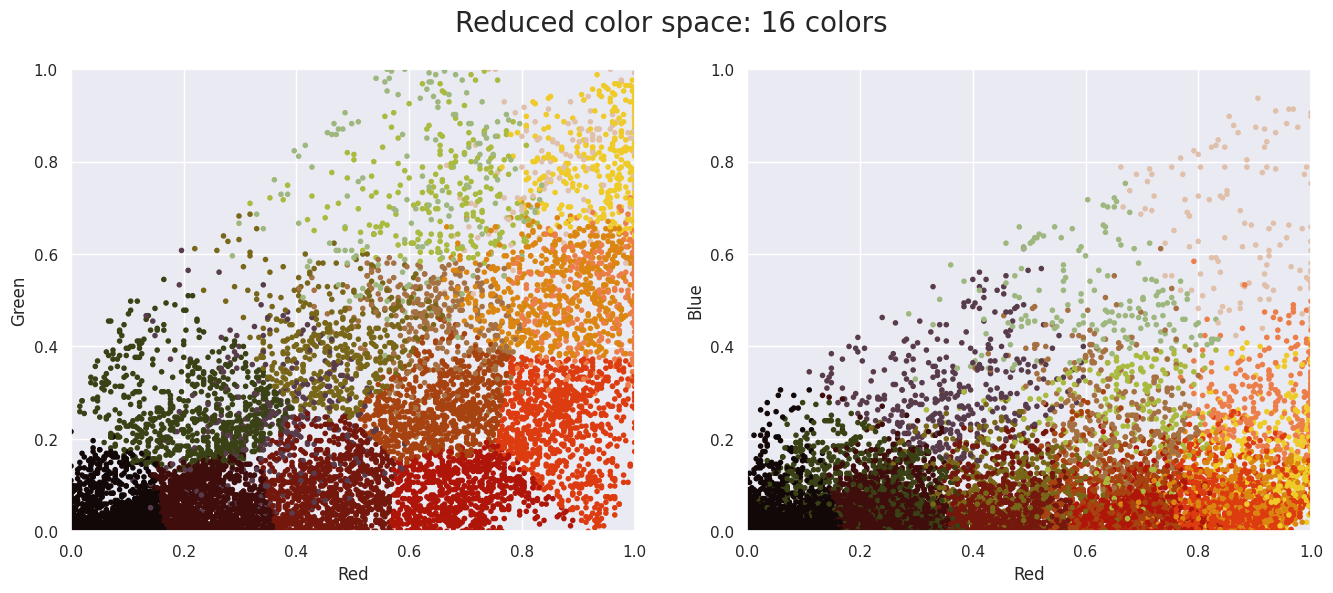

In [20]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(liony)
new_colors = kmeans.cluster_centers_[kmeans.predict(liony)]

plot_pixels(liony, colors=new_colors,
            title="Reduced color space: 16 colors")

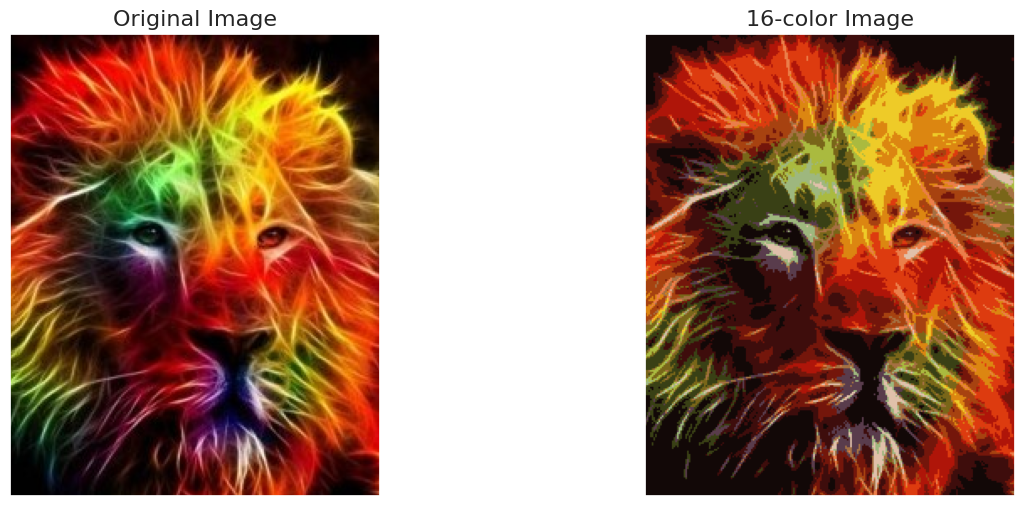

In [21]:
lion_recolored = new_colors.reshape(lion.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(lion)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(lion_recolored)
ax[1].set_title('16-color Image', size=16);

# store to file
plt.savefig("lion_kmean.png", dpi=125)


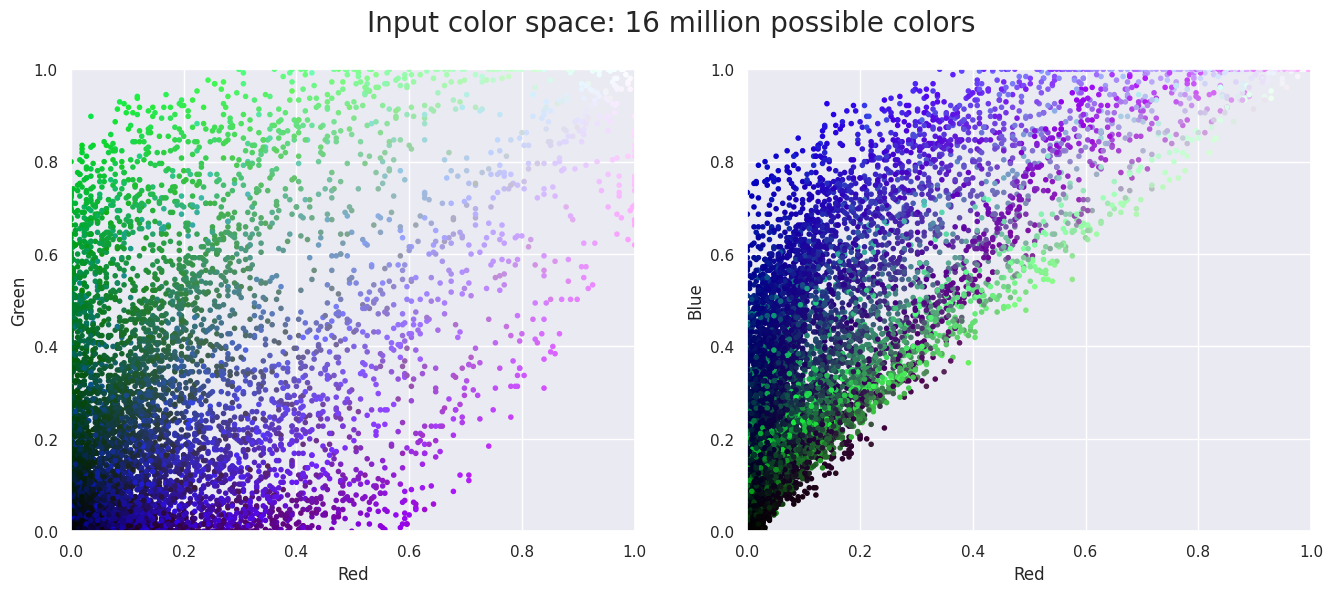

In [22]:
plot_pixels(wolfy, title='Input color space: 16 million possible colors')

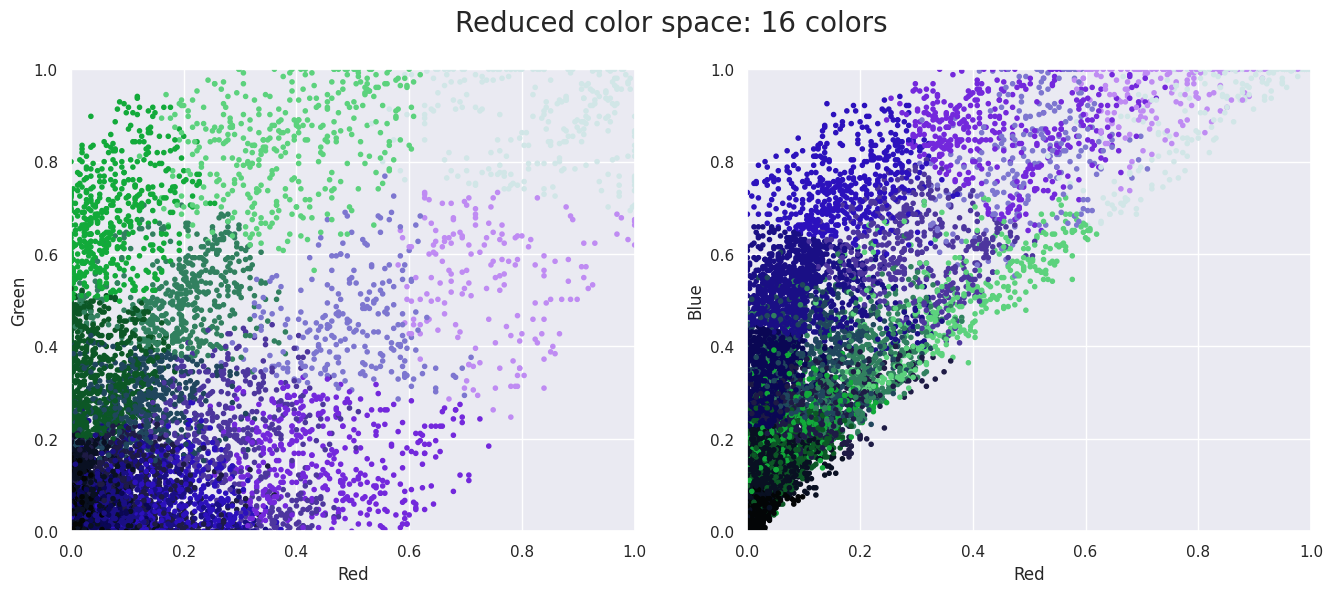

In [23]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(wolfy)
new_colors = kmeans.cluster_centers_[kmeans.predict(wolfy)]

plot_pixels(wolfy, colors=new_colors,
            title="Reduced color space: 16 colors")


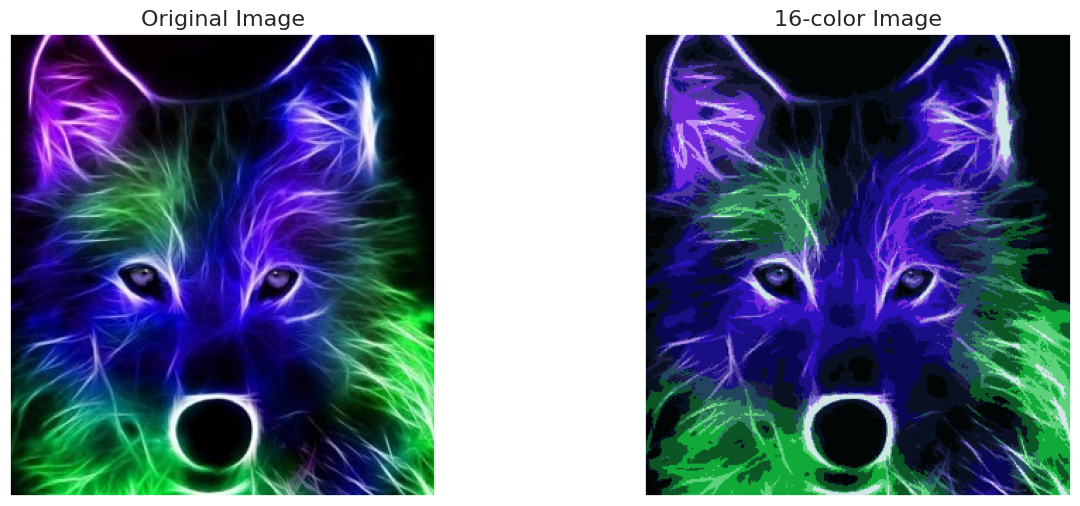

In [24]:
wolf_recolored = new_colors.reshape(wolf.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(wolf)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(wolf_recolored)
ax[1].set_title('16-color Image', size=16);

# store to file
plt.savefig("wolf_kmean.png", dpi=125)